<h1>Titanic - Logistic Regression Model</h1>

<u><h3>Objective</h3></u>
<p>The goal is to predict which passengers would of survived the tragedy using machine learning as we all learning all the types of people who have survived with graphical analysis.</p>

<u><h3>Setup</h3></u>

In [14]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# read in training and test data
train_data = pd.read_csv('../input/titanic/train.csv')
test_data = pd.read_csv('../input/titanic/test.csv')

<u><h3>Data Definitions</h3></u>
<table>
<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>Sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</tbody>
</table>

<u><h3>Variable Notes</h3></u>
<p><b>pclass</b>: A proxy for socio-economic status (SES)<br> 1st = Upper<br> 2nd = Middle<br> 3rd = Lower<br><br> <b>age</b>: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5<br><br> <b>sibsp</b>: The dataset defines family relations in this way...<br> Sibling = brother, sister, stepbrother, stepsister<br> Spouse = husband, wife (mistresses and fiancés were ignored)<br><br> <b>parch</b>: The dataset defines family relations in this way...<br> Parent = mother, father<br> Child = daughter, son, stepdaughter, stepson<br> Some children travelled only with a nanny, therefore parch=0 for them.</p>

<u><h3>Exploratory Data Analysis</h3></u>
Since our focus is on the survival of each passenger, it would be wise to graphically analyze all the quantitative variables against the survival variable in the training dataset.

<h4>Correlation Matrix of all the variables</h4>

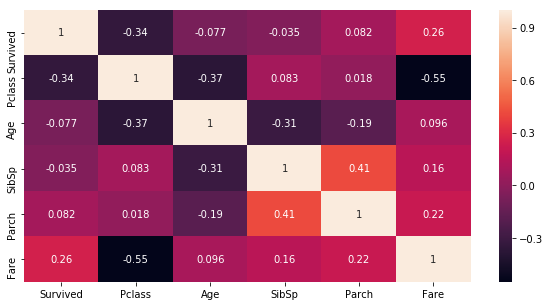

In [15]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(train_data.iloc[:,1:].corr(), annot = True, ax = ax)
plt.show()

**Comment**: Here, there is no evidence of any linear relationships, which usually implies a linear model is sufficient but since we know that we have a binary response, it would be definitely more suitable to utilize a logistic regression model.

<h4>Barchart of the survival of the passengers based on their social class</h4>

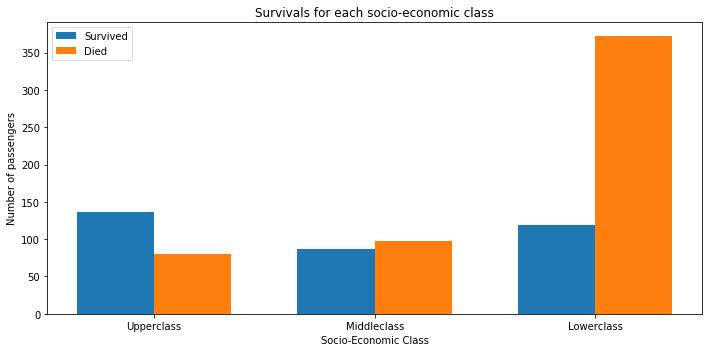

In [16]:
# barchart of pclass vs. survival
fig, ax = plt.subplots(figsize = (10,5))

# retrieve relevant data
survived = train_data[train_data['Survived'] == 1]['Pclass'].value_counts()
perished = train_data[train_data['Survived'] == 0]['Pclass'].value_counts()
survived.sort_index(inplace = True)
perished.sort_index(inplace = True)

# plot data
bar_width = 0.35
survived_bar = plt.bar(survived.index.values, survived, bar_width, label = "Survived")
perished_bar = plt.bar(perished.index.values + bar_width, perished, bar_width, label = "Died")

# plot labels
plt.xlabel('Socio-Economic Class')
plt.ylabel('Number of passengers')
plt.title('Survivals for each socio-economic class')
plt.xticks(survived.index.values + 0.175, ('Upperclass', 'Middleclass', 'Lowerclass'))
plt.legend()

# show plot
plt.tight_layout()
plt.show()

**Comment**: Here, we see that the upperclass has the highest survival rate out of the three and a proportion of the upperclass made it out alive. The middle class was about equal chance of survival and has the lowest amount of passengers out of the three social classes. Lastly, we see that the lowerclass had the least survival chance as most passengers of this social class perished as denoted by the high number of deaths. Also, it had the higher number of passengers compared to the other two. In conclusion, we can agree that the upperclass individuals had a higher chance and the middle class had equal chance, while the lower class had lowest chance of survival proportionally.

<h4>Piechart of those who survived, categorized by gender</h4>

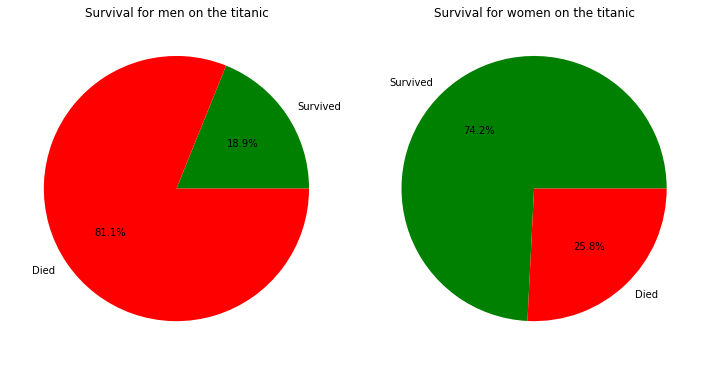

In [17]:
# get copy of the main data frame
temp_df = train_data.copy()
temp_df = temp_df[['Survived', 'Sex']]

# get number of who survived and died for the males
men_survived = temp_df[temp_df['Sex'] == 'male']['Survived'].value_counts()[1]
men_perished = temp_df[temp_df['Sex'] == 'male']['Survived'].value_counts()[0]
total_males = men_survived + men_perished
men_data = [men_survived, men_perished]/total_males

# get number of who survived and died for the females
women_survived = temp_df[temp_df['Sex'] == 'female']['Survived'].value_counts()[1]
women_perished = temp_df[temp_df['Sex'] == 'female']['Survived'].value_counts()[0]
total_females = women_survived + women_perished
women_data = [women_survived, women_perished]/total_females

# plot two piecharts for both genders
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))
ax1.pie(men_data, labels = ['Survived', 'Died'], colors = ['green', 'red'], autopct = '%1.1f%%')
ax1.set_title('Survival for men on the titanic')
ax2.pie(women_data, labels = ['Survived', 'Died'], colors = ['green', 'red'], autopct = '%1.1f%%')
ax2.set_title('Survival for women on the titanic')

# display plot
plt.tight_layout()
plt.show()

**Comment**: It is quite evident that the women on the titanic had a much greater chance of survival then men as we can see above they had a 74.2% survival rate as opposed the the 18.9% survival rate for men.

<h4>Survival distribution by age</h4>

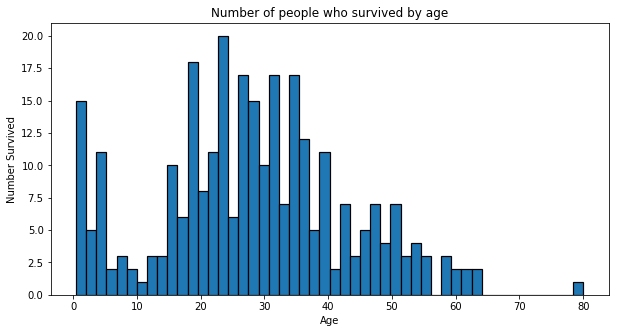

In [18]:
# retrieve all the survivor's ages
temp_df = train_data.copy()
temp_df = temp_df[temp_df['Survived'] == 1]
agedist = temp_df.sort_values('Age')
agedist = agedist['Age']

# display histogram
fig = plt.figure(figsize = (10,5))
plt.hist(agedist[~np.isnan(agedist)], edgecolor='black', linewidth = 1.2, bins = 50)
plt.xlabel('Age')
plt.ylabel('Number Survived')
plt.title('Number of people who survived by age')
plt.show()

**Comment**: Here, we can see the a majority of those that escaped safely were predominantly younger than 40 and only the individuals in the teenage years had a lower survival rate in the younger group whereas the infants had a higher chance of survival. Furthermore when we examine the second piechart above, we can see that a majority of these survivors would of being female.

<h4>Survival distributed based on individual's number of siblings/spouses on the Titanic</h4>

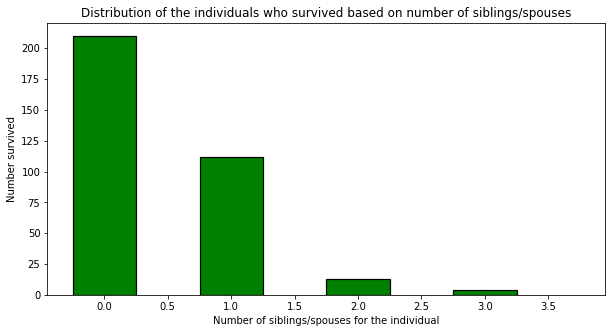

In [19]:
# retrieve the appropriate data
temp_df = train_data[['Survived', 'SibSp']].copy()
temp_df = temp_df[temp_df['Survived'] == 1]['SibSp']

# plot histogram of the distribution
fig = plt.figure(figsize = (10,5))
plt.hist(temp_df, bins = np.arange(5) - 0.25, edgecolor='black', linewidth = 1.2, width = 0.5, color = 'green')
plt.xlabel('Number of siblings/spouses for the individual')
plt.ylabel('Number survived')
plt.title('Distribution of the individuals who survived based on number of siblings/spouses')
plt.show()

**Comment**: It seems that most survivors on the Titanic had either 1 or none siblings or spouses onboard where as the survival chance of individuals who had greater than 1 were low. However, this is not conclusive as there may have been insufficient data for individuals who had 2 or more siblings or spouses and here we did not encapsulate the age of these individuals nor consider that they may not have had siblings or spouses on board but may have parents or children.
    
<h4>Survival distributed based on individual's number of parents/children aboard the Titanic</h4>

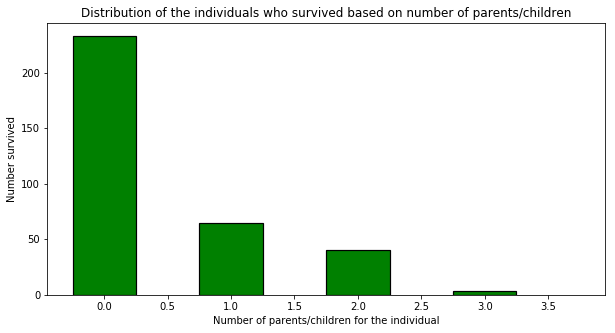

In [20]:
# retrieve the appropriate data
temp_df = train_data[['Survived', 'Parch']].copy()
temp_df = temp_df[temp_df['Survived'] == 1]['Parch']

# plot histogram of the distribution
fig = plt.figure(figsize = (10,5))
plt.hist(temp_df, bins = np.arange(5) - 0.25, edgecolor='black', linewidth = 1.2, width = 0.5, color = 'green')
plt.xlabel('Number of parents/children for the individual')
plt.ylabel('Number survived')
plt.title('Distribution of the individuals who survived based on number of parents/children')
plt.show()

**Comment**: Similarly we have the same trend as above with many survivors having no parents or children on board on the Titanic and the downtrend continues as the number increases.
    
<h4>Survival distributed based on the passenger fare</h4>

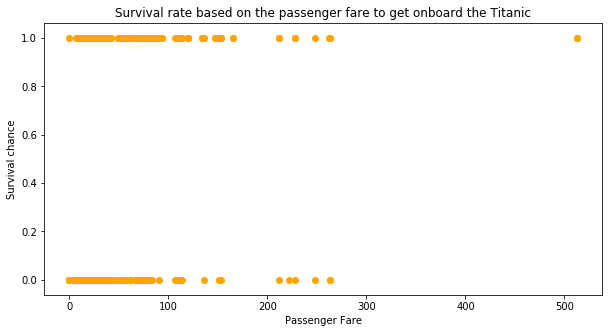

In [21]:
# retrieve data
temp_df = train_data[['Survived', 'Fare']].copy()
temp_df.sort_values(by = ['Fare'], inplace = True)

# plot scatterplot
fig = plt.figure(figsize = (10,5))
plt.scatter(temp_df['Fare'].values, temp_df['Survived'].values, color = 'orange')
plt.xlabel('Passenger Fare')
plt.ylabel('Survival chance')
plt.title('Survival rate based on the passenger fare to get onboard the Titanic')
plt.show()

**Comment:** Here, we can see that there is a slight increase in the survival chance as the passenger fare increases. This is especially true at the right tail of the data points as we see when the fares from 100 and above, there is more individuals surviving as opposed to dieing and we have some outliers in the 500 fare range which also shows they have survived.

<u><h3>Machine Learning Algorithm: Logistic Regression</h3></u>
Since we have a binary response, it would definitely be wise to use a logistic regression model to fit our data and we should select the appropriate features to use in our model.

In [22]:
# seperate the survived column from the training data as a response vector
# drop features that are not useful such as the Name and Ticket etc...
features = train_data.drop(["Survived", "Name", "Ticket", "Cabin", "Embarked"], axis = 1)
response = train_data["Survived"]

# data wrangling process
# change the male/female terms in the Sex column into 0 and 1 respectively
features.loc[features['Sex'] == 'male', 'Sex'] = 0
features.loc[features['Sex'] == 'female', 'Sex'] = 1

# remove NaN values for each column and replace with the mean of the respective columns values
features['Age'] = features['Age'].fillna(features['Age'].dropna().mean())
features['Fare'] = features['Fare'].fillna(features['Fare'].dropna().mean())

# conduct same cleansing procedure for the test_data
test_data = test_data.drop(["Name", "Ticket", "Cabin", "Embarked"], axis = 1)
test_data.loc[test_data['Sex'] == 'male', 'Sex'] = 0
test_data.loc[test_data['Sex'] == 'female', 'Sex'] = 1
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].dropna().mean())
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].dropna().mean())

# build the model
logreg = linear_model.LogisticRegression(solver='lbfgs', max_iter = 5000)
logreg_fit = logreg.fit(features, response)
logreg_predict = logreg.predict(test_data)

# crate new dataframe to store the predicted survival chances along with the passenger id
submission_df = pd.DataFrame({'PassengerID': test_data['PassengerId'],
                             'Survived': logreg_predict})
submission_df.to_csv('submission.csv', index = False)

**Comment:** Now, that we have built our model, fit our training data to it and used the model to predict the survival of the passengers in the testing dataset we have put it into a dataframe ready for submission, adhearing to the submission format of course.